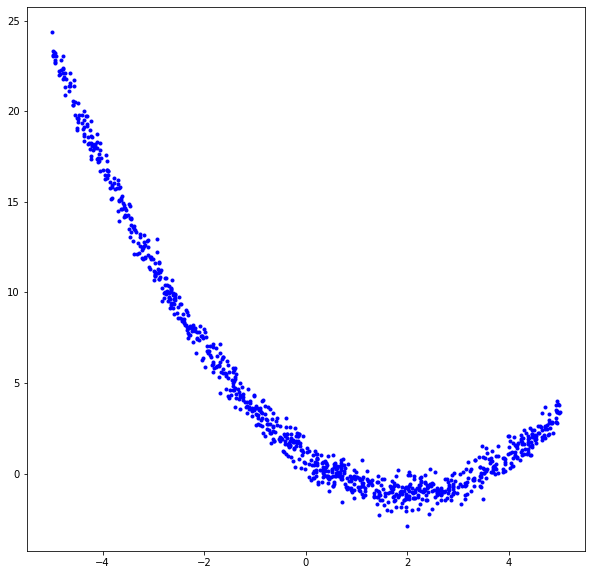

In [1]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML
import math 
import pandas as pd




"""
Generate data points for plotting the error surface.
"""
def calculateErrorSurface(y, x):
    # Generate values for parameter space.
    N = 200
    a0 = np.linspace(-10.0, 14.0, N)
    a1 = np.linspace(-10.0, 14.0, N)
    a2 = np.linspace(-10.0, 14.0, N)

    A0, A1, A2 = np.meshgrid(a0, a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A0[iter1][iter2] + A1[iter1][iter2]*x + A2[iter1][iter2]*x**2
            J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )
            
    return J, A0, A1, A2
            
"""
Calculate closed-form solution using the normal equation.
"""
def calculateClosedFormSolutionA(X, x, y):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0, 0] + a_opt[1, 0]*x
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt

def calculateClosedFormSolutionB(X, x, y):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0, 0] + a_opt[1, 0]*x + a_opt[2, 0]*x**2
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt

def calculateClosedFormSolutionC(X, x, y):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0, 0] + a_opt[1, 0]*x + a_opt[2, 0]*x**2 + a_opt[3, 0]*x**3
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt

def calculateClosedFormSolutionD(X, x, y):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0, 0] + a_opt[1, 0]*x + a_opt[2, 0]*x**2 + a_opt[3, 0]*x**3 + a_opt[4, 0]*x**4
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt

"""
Batch gradient descent solution.
"""
def batchGradientDescentA(alpha, n_iterations, X_b, y):
    # Random initialization of parameters.
    a = np.zeros((2,1))
    a[0] = -10;
    a[1] = -10;
    
    Jgd = np.zeros(n_iterations+1)
    Jgd[0] = (1/M)*sum(np.power(y - X_b.dot(a), 2))

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[0, 0] = a[0]
    a_hist[1, 0] = a[1]

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
        a = a - alpha * gradients
        Jgd[iteration+1] = (1/M)*sum(np.power( (y - X_b.dot(a)) , 2))
        a_hist[0, iteration+1] = a[0]
        a_hist[1, iteration+1] = a[1]
        
    return a, a_hist, Jgd


def batchGradientDescentP(a, n_iterations, X_b, y):
    
    Jgd = np.zeros(n_iterations+1)

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        Jgd[iteration+1] = (1/M)*sum(np.power( (y - X_b.dot(a)) , 2))
        
    return Jgd

def batchGradientDescentB(alpha, n_iterations, X_b, y):
    # Random initialization of parameters.
    a = np.zeros((3,1))
    a[0] = -10;
    a[1] = -10;
    a[2] = -10;
    
    Jgd = np.zeros(n_iterations+1)
    Jgd[0] = (1/M)*sum(np.power(y - X_b.dot(a), 2))

    # Create vector for parameter history.
    a_hist = np.zeros((3, n_iterations+1))
    # Initialize history vector.
    a_hist[0, 0] = a[0]
    a_hist[1, 0] = a[1]
    a_hist[2, 0] = a[2]

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
        a = a - alpha * gradients
        Jgd[iteration+1] = (1/M)*sum(np.power( (y - X_b.dot(a)) , 2))
        a_hist[0, iteration+1] = a[0]
        a_hist[1, iteration+1] = a[1]
        a_hist[2, iteration+1] = a[2]
        
    return a, a_hist, Jgd

def batchGradientDescentC(alpha, n_iterations, X_b, y):
    # Random initialization of parameters.
    a = np.zeros((4,1))
    a[0] = -10;
    a[1] = -10;
    a[2] = -10;
    a[3] = -10;
    
    Jgd = np.zeros(n_iterations+1)
    Jgd[0] = (1/M)*sum(np.power(y - X_b.dot(a), 2))

    # Create vector for parameter history.
    a_hist = np.zeros((4, n_iterations+1))
    # Initialize history vector.
    a_hist[0, 0] = a[0]
    a_hist[1, 0] = a[1]
    a_hist[2, 0] = a[2]
    a_hist[3, 0] = a[3]

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
        a = a - alpha * gradients
        Jgd[iteration+1] = (1/M)*sum(np.power( (y - X_b.dot(a)) , 2))
        a_hist[0, iteration+1] = a[0]
        a_hist[1, iteration+1] = a[1]
        a_hist[2, iteration+1] = a[2]
        a_hist[3, iteration+1] = a[3]
        
    return a, a_hist, Jgd

def batchGradientDescentD(alpha, n_iterations, X_b, y):
    # Random initialization of parameters.
    a = np.zeros((5,1))
    a[0] = -10;
    a[1] = -10;
    a[2] = -10;
    a[3] = -10;
    a[4] = -10;

    Jgd = np.zeros(n_iterations+1)
    Jgd[0] = (1/M)*sum(np.power(y - X_b.dot(a), 2))
    
    # Create vector for parameter history.
    a_hist = np.zeros((5, n_iterations+1))
    # Initialize history vector.
    a_hist[0, 0] = a[0]
    a_hist[1, 0] = a[1]
    a_hist[2, 0] = a[2]
    a_hist[3, 0] = a[3]
    a_hist[4, 0] = a[4]

    # Batch gradient-descent loop.
    for iteration in range(n_iterations):
        gradients = -2/M * X_b.T.dot(y - X_b.dot(a))
        a = a - alpha * gradients
        Jgd[iteration+1] = (1/M)*sum(np.power( (y - X_b.dot(a)) , 2))
        a_hist[0, iteration+1] = a[0]
        a_hist[1, iteration+1] = a[1]
        a_hist[2, iteration+1] = a[2]
        a_hist[3, iteration+1] = a[3]
        a_hist[4, iteration+1] = a[4]
        
    return a, a_hist, Jgd

"""
Hypothesis Function
"""
def h(X_b, a):
    return a.T.dot(X_b.T)
    
## --------------------------------------------------------   
    
    
df = pd.read_csv('training.csv', header=None)

xAux = df[0].to_numpy()
yAux = df[1].to_numpy()

# Number of examples.
M = len(xAux)

# Generate target function.
x = np.array(np.ones((M, 1))) 
y = np.array(np.ones((M, 1))) 


for i in range (M):
    x[i] = [xAux[i]]
    y[i] = [yAux[i]]

    
#a. h = a0 + a1*x
XA = np.c_[np.ones((M, 1)),x]
X_bA = XA

#b. h = a0 + a1*x + a2*x^2
XB = np.c_[np.ones((M, 1)),x, x**2]
X_bB = XB

#c. h = a0 + a1*x + a2*x^2 + a3*x^3
XC = np.c_[np.ones((M, 1)),x, x**2, x**3]
X_bC = XC

#d. h = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4
XD = np.c_[np.ones((M, 1)),x, x**2, x**3, x**4]
X_bD = XD

n_iterations = 1000
a = np.zeros((3,1))


# Batch gradient descent solution.
alphaA = 0.1  # learning rate
alphaB = 0.008  # learning rate
alphaC = 0.0004  # learning rate
alphaD = 0.00002  # learning rate

    
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, 'b.')

In [2]:
# Calculate closed-form solution.
JoptimumA, a_optA = calculateClosedFormSolutionA(X_bA, x, y)
JoptimumB, a_optB = calculateClosedFormSolutionB(X_bB, x, y)
JoptimumC, a_optC = calculateClosedFormSolutionC(X_bC, x, y)
JoptimumD, a_optD = calculateClosedFormSolutionD(X_bD, x, y)

In [3]:
# Run batch gradient-descent algorithm.
aA, a_histA, JgdA = batchGradientDescentA(alphaA, n_iterations, X_bA, y)
aB, a_histB, JgdB = batchGradientDescentB(alphaB, n_iterations, X_bB, y)
aC, a_histC, JgdC = batchGradientDescentC(alphaC, n_iterations, X_bC, y)
aD, a_histD, JgdD = batchGradientDescentD(alphaD, n_iterations, X_bD, y)

In [4]:
# Print found values.
print('---Início A---')

print('')

print('a0_opt: ' + str(a_optA[0, 0]))
print('a1_opt: ' + str(a_optA[1, 0]))

print('')

print('a0_sgd: ' + str(aA[0, 0]))
print('a1_sgd: ' + str(aA[1, 0]))

print('')

print('---Fim A ---')

print('')

# Print found values.
print('---Início B---')

print('')

print('a0_opt: ' + str(a_optB[0, 0]))
print('a1_opt: ' + str(a_optB[1, 0]))
print('a1_opt: ' + str(a_optB[2, 0]))

print()

print('a0_sgd: ' + str(aB[0, 0]))
print('a1_sgd: ' + str(aB[1, 0]))
print('a2_sgd: ' + str(aB[2, 0]))

print('')

print('---Fim B ---')

print('')

# Print found values.
print('---Início C---')

print('')

print('a0_opt: ' + str(a_optC[0, 0]))
print('a1_opt: ' + str(a_optC[1, 0]))
print('a1_opt: ' + str(a_optC[2, 0]))
print('a1_opt: ' + str(a_optC[3, 0]))

print()

print('a0_sgd: ' + str(aC[0, 0]))
print('a1_sgd: ' + str(aC[1, 0]))
print('a2_sgd: ' + str(aC[2, 0]))
print('a2_sgd: ' + str(aC[3, 0]))

print()

print('---Fim C ---')

print('')

# Print found values.
print('---Início D---')

print('')

print('a0_opt: ' + str(a_optD[0, 0]))
print('a1_opt: ' + str(a_optD[1, 0]))
print('a1_opt: ' + str(a_optD[2, 0]))
print('a1_opt: ' + str(a_optD[3, 0]))
print('a1_opt: ' + str(a_optD[4, 0]))

print()

print('a0_sgd: ' + str(aD[0, 0]))
print('a1_sgd: ' + str(aD[1, 0]))
print('a2_sgd: ' + str(aD[2, 0]))
print('a2_sgd: ' + str(aD[3, 0]))
print('a2_sgd: ' + str(aD[4, 0]))

print('')

print('---Fim D ---')


---Início A---

a0_opt: 4.939361968021299
a1_opt: -1.9593032431040307

a0_sgd: 4.939361968021296
a1_sgd: -1.9593032431040303

---Fim A ---

---Início B---

a0_opt: 0.9924663768766173
a1_opt: -2.008575853414246
a1_opt: 0.49872709942636295

a0_sgd: 0.9866024898068331
a1_sgd: -2.0085873049195833
a2_sgd: 0.4991232879969605

---Fim B ---

---Início C---

a0_opt: 0.9928568135454903
a1_opt: -2.013607794117661
a1_opt: 0.49866875011127954
a1_opt: 0.0003389545838042851

a0_sgd: -5.986046843973923
a1_sgd: -4.510168119606596
a2_sgd: 0.9624196946193225
a2_sgd: 0.1381351175824346

---Fim C ---

---Início D---

a0_opt: 0.993646209540799
a1_opt: -2.0136007805033564
a1_opt: 0.498334586654126
a1_opt: 0.00033765179856970473
a1_opt: 1.5787863001714975e-05

a0_sgd: -9.099586583319198
a1_sgd: -9.007727561498088
a2_sgd: -5.603351779426857
a2_sgd: 0.37429387173147466
a2_sgd: 0.3420765531109313

---Fim D ---


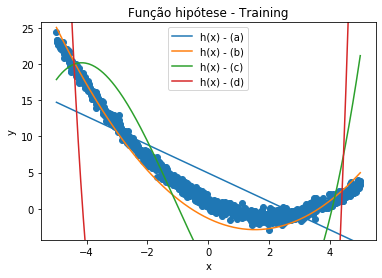

In [5]:
fig, ax = plt.subplots()
plt.scatter(x, y)
xl = []
yl = []
la, = plt.plot(xl, yl, animated=True, label='h(x) - (a)')
lb, = plt.plot(xl, yl, animated=True, label='h(x) - (b)')
lc, = plt.plot(xl, yl, animated=True, label='h(x) - (c)')
ld, = plt.plot(xl, yl, animated=True, label='h(x) - (d)')
plt.title('Função hipótese - Training')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend(handles=[la, lb, lc, ld])
    return la,

def update(frame):
    theta = np.zeros((2,1))
    theta[0] = a_histA[0,frame]
    theta[1] = a_histA[1,frame]
    f = functools.partial(h, a=theta)
    y = f(X_bA)
    la.set_data(x, y)
    
    theta = np.zeros((3,1))
    theta[0] = a_histB[0,frame]
    theta[1] = a_histB[1,frame]
    theta[2] = a_histB[2,frame]
    f = functools.partial(h, a=theta)
    y = f(X_bB)
    lb.set_data(x, y)
    
    theta = np.zeros((4,1))
    theta[0] = a_histC[0,frame]
    theta[1] = a_histC[1,frame]
    theta[2] = a_histC[2,frame]
    theta[3] = a_histC[3,frame]
    f = functools.partial(h, a=theta)
    y = f(X_bC)
    lc.set_data(x, y)
    
    
    theta = np.zeros((5,1))
    theta[0] = a_histD[0,frame]
    theta[1] = a_histD[1,frame]
    theta[2] = a_histD[2,frame]
    theta[3] = a_histD[3,frame]
    theta[4] = a_histD[4,frame]
    f = functools.partial(h, a=theta)
    y = f(X_bD)
    ld.set_data(x, y)
    
    
    return la, lb, lc, ld

# Create animated figure.
ani = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=300)
# Display the animated figure.
display(HTML(ani.to_html5_video()))

# Save the animated figure.
#ani.save('animated_linear_regression.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

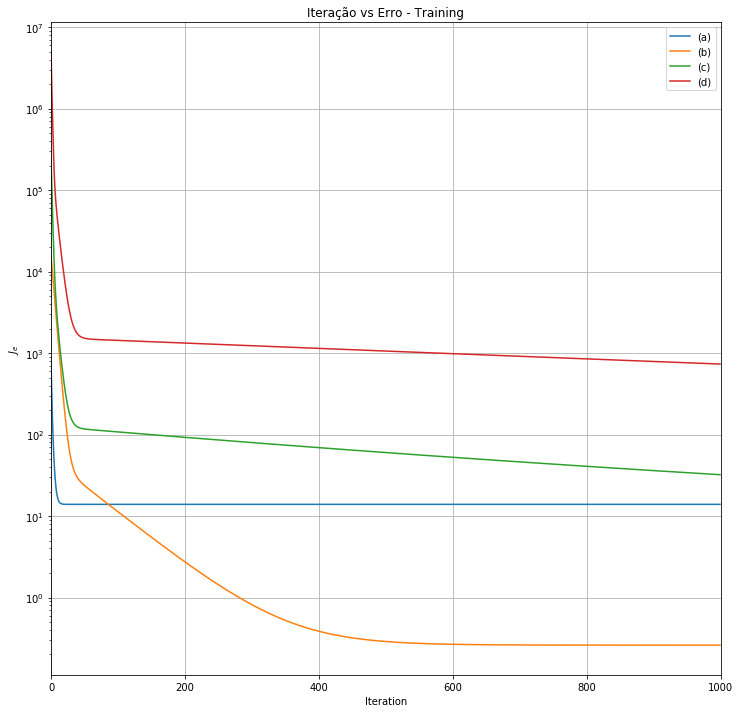

In [6]:
fig = plt.figure(figsize=(12,12))
plt.plot(np.arange(0, n_iterations), JgdA[0:n_iterations], label='(a)')
plt.plot(np.arange(0, n_iterations), JgdB[0:n_iterations], label='(b)')
plt.plot(np.arange(0, n_iterations), JgdC[0:n_iterations], label='(c)')
plt.plot(np.arange(0, n_iterations), JgdD[0:n_iterations], label='(d)')
plt.xlim((0, n_iterations))
plt.yscale('log')
plt.grid(b=True)
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Iteração vs Erro - Training')
plt.legend()
plt.show()

In [7]:
df = pd.read_csv('predicting.csv', header=None)

xxAux = df[0].to_numpy()
yyAux = df[1].to_numpy()

# Number of examples.
#M = len(xxAux)

# Generate target function.
xx = np.array(np.ones((M, 1))) 
yy = np.array(np.ones((M, 1))) 


for i in range (M):
    xx[i] = [xxAux[i]]
    yy[i] = [yyAux[i]]


#a. h = a0 + a1*x
XAA = np.c_[np.ones((M, 1)), xx]
X_bAA = XAA

#b. h = a0 + a1*x + a2*x^2
XBB = np.c_[np.ones((M, 1)),xx, xx**2]
X_bBB = XBB

#c. h = a0 + a1*x + a2*x^2 + a3*x^3
XCC = np.c_[np.ones((M, 1)),xx, xx**2, xx**3]
X_bCC = XCC

#d. h = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4
XDD = np.c_[np.ones((M, 1)),xx, xx**2, xx**3, xx**4]
X_bDD = XDD
    
# Run batch gradient-descent algorithm for testing.
#aAA, a_histAA, JgdAA = batchGradientDescentP(alphaA, n_iterations, X_bA, yy)
#aBB, a_histBB, JgdBB = batchGradientDescentB(alphaB, n_iterations, X_bB, yy)
#aCC, a_histCC, JgdCC = batchGradientDescentC(alphaC, n_iterations, X_bC, yy)
#aDD, a_histDD, JgdDD = batchGradientDescentD(alphaD, n_iterations, X_bD, yy)

#JgdAA = batchGradientDescentP(aA, n_iterations, X_bAA, yy)
#JgdBB = batchGradientDescentP(aB, n_iterations, X_bBB, yy)
#JgdBB = batchGradientDescentP(aC, n_iterations, X_bCC, yy)
#JgdBB = batchGradientDescentP(aD, n_iterations, X_bDD, yy)

**A. Qual das funções hipótese acima aproxima melhor a função alvo (target), ou seja, qual produz o menor erro ao final do treinamento?**

R: A função hipótese melhor se aproxima a função target e produz menor erro ao final do treinamento é a **b. (h = a0 + a1*x + a2*x^2)**

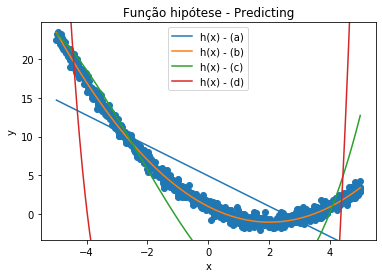

In [8]:
fig, ax = plt.subplots()
plt.scatter(xx, yy)
xl = []
yl = []
#ln, = plt.plot(xl, yl, 'r--', animated=True, label='h(x)')
la, = plt.plot(xl, yl, animated=True, label='h(x) - (a)')
lb, = plt.plot(xl, yl, animated=True, label='h(x) - (b)')
lc, = plt.plot(xl, yl, animated=True, label='h(x) - (c)')
ld, = plt.plot(xl, yl, animated=True, label='h(x) - (d)')
plt.title('Função hipótese - Predicting')

def init():
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.legend(handles=[la, lb, lc, ld])
    return la,

def update(frame):

    theta = aA#np.zeros((2,1))
    #theta[0] = a_histAA[0,frame]
    #theta[1] = a_histAA[1,frame]
    f = functools.partial(h, a=theta)
    y = f(X_bAA)
    la.set_data(xx, y)
    
    theta = aB#np.zeros((3,1))
    #theta[0] = a_histBB[0,frame]
    #theta[1] = a_histBB[1,frame]
    #theta[2] = a_histBB[2,frame]
    f = functools.partial(h, a=theta)
    y = f(X_bBB)
    lb.set_data(xx, y)
    
    theta = aC#np.zeros((4,1))
    #theta[0] = a_histCC[0,frame]
    #theta[1] = a_histCC[1,frame]
    #theta[2] = a_histCC[2,frame]
    #theta[3] = a_histCC[3,frame]
    f = functools.partial(h, a=theta)
    y = f(X_bCC)
    lc.set_data(xx, y)
    
    
    theta =aD #np.zeros((5,1))
    #theta[0] = a_histDD[0,frame]
    #theta[1] = a_histDD[1,frame]
    #theta[2] = a_histDD[2,frame]
    #theta[3] = a_histDD[3,frame]
    #theta[4] = a_histDD[4,frame]
    f = functools.partial(h, a=theta)
    y = f(X_bDD)
    ld.set_data(xx, y)
    return la, lb, lc, ld

# Create animated figure.
ani = FuncAnimation(fig, update, frames=200, init_func=init, blit=False, interval=300)
# Display the animated figure.
display(HTML(ani.to_html5_video()))

# Save the animated figure.
#ani.save('animated_linear_regression.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

**B. Dado que você encontrou os parâmetros que otimizam cada uma das funções hipótese acima (ou seja, você agora tem um modelo treinado que pode predizer o resultado para novos exemplos), use os dados contidos no arquivo
predicting.csv e calcule o erro quadrático médio para cada um dos modelos (i.e., função hipótese). Qual função hipótese resulta no menor erro quadrático médio? O que você consegue concluir a respeito deste resultado?**

R: A função hipótese que resulta no menor erro quadrático médio é novamente a **b. (h = a0 + a1*x + a2*x^2)**. Podemos concluir que a função que mais se aproxima da função alvo durante o treinamento também apresenta melhor desempenho na fase de testes. Podemos ainda concluir que com muitas dimensões a pesquisa torna-se mais difícil e com poucas dimensões a pesquisa pode ter detalhes insuficientes para produzir resultados ótimos. Nem sempre os dados de treinamento produzem uma recta, e nesses casos eles não podem ser predizidos com uma recta.